## Probleme 1: Methode de rejet pour la loi normal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sympy import *

In [2]:
# Algorithm
def simul_unif():
    continuer = True
    while continuer :
        U = np.random.uniform(0,1,3)
        Y = -np.log(U[0])
        tmp = np.exp(-(Y - 1)**2 / 2)
        if U[1] <= tmp :
            continuer = False
            if U[2] <= 1/2:
                Z = Y
            else:
                Z = - Y
    return Z

def simul_unif_obs(n_observation=1) :
    Z = []
    for i in range(n_observation):
        Z.append(simul_unif())
    return np.array(Z)

In [3]:
def simul_norm(mu, epsilon_carree):
    X = np.sqrt(epsilon_carree) * simul_unif() + mu
    return X

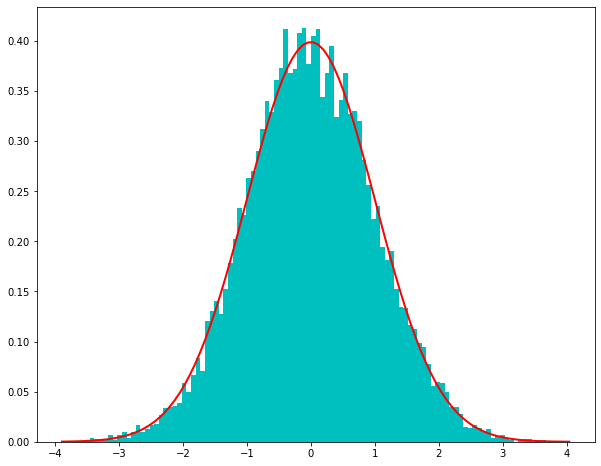

In [4]:
# Histogram 

data_simul = simul_unif_obs(10000)
mu, std = 0, 1
plt.figure(figsize=(10,8))
plt.hist(data_simul, bins=100, density=True, alpha=1, color='c')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()
#plt.savefig("./figure/dnorm.png")

**Reponses aux questions:**
<br>

1.D'après les deux graphiques, notre simulation suit bien une loi normale attendue, car pour 10000 observations, la frequence (l'histogramme) observée est proche de l'aire sous la courbe représentative de la densité de la loi normale.

2.(a) Utilisons l'algorithme précédent pour approcher $\boldsymbol{E}(x) \, et\, \boldsymbol{E}(x^2)$ avec k = 100 repetitions



In [5]:
# simulation-2
E_X = []
for k in range(100):
    E_X.append(simul_norm(24,4))
E_X_aproximate = np.mean(E_X)
print(f"E(X) = {24}\nE(X)_Approchee = {E_X_aproximate}")

E(X) = 24
E(X)_Approchee = 24.23439757460819


**D'apres plusieurs simulations, la valeur estimeé de $\boldsymbol{E}(X)$ est proche de la valeur exacte** 

In [6]:
# moment 2
E_X_carree = []
for k in range(100):
    E_X_carree.append(simul_norm(24,4))
E_X_carrree_aproximate = np.mean(pow(np.array(E_X_carree),2))
print(f"E(X^2) = {580}\nE(X^2)_Approchee = {E_X_carrree_aproximate}")

E(X^2) = 580
E(X^2)_Approchee = 576.5163160967176


**On remarque qu'apres plusieurs simulations, la valeur estimeé de $\boldsymbol{E}(x^2)$ est proche de la valeur exacte mais moins precis que le premier moment.**

**3.Utilisons l’algorithme précédent pour approcher $\boldsymbol{E}(x^5)$ par simulation (k =100)**

In [7]:
E_X = []
for k in range(100):
    E_X.append(simul_norm(24,4))

E_X_aproximate = np.mean(pow(np.array(E_X),5))
print(f"E(X)_Approchee = {E_X_aproximate}")

E(X)_Approchee = 8953871.960345784


**La valeur estimée de $\boldsymbol{E}(x^5)$ est moins precis avec 100 répétitions**

## Probleme 2: Méthode de rejet pour la loi Beta

**1.  L'algorithme permettant de simuler des donnees a partir de la variable aleatoire $X$ de densité $f(x)$, est** : 
<br>

(a) Générer U1, U2 uniformement sur [0,1]
<br>
(b) determiner c = max( f(x)/g(x) )
<br>
(c) si (U2 <= f(U1) / c*g(U1) ) :
        aller à (d)
     sinon: aller à (a)
<br>
(d) Z = U1


In [8]:
# implementation de l'algorithme
def simul_beta():
    x = Symbol('X', real=True)
    f = 1260 * (x**4) * (1-x)**5
    fprime = f.diff(x)
    c = solve(fprime, x)
    f_v = []
    for i in c:
        f_v.append(1260*i**4*(1-i)**5)
    c = max(f_v)
    continuer = True
    while continuer:
        U = np.random.uniform(0,1,2)
        Y = ((1260*U[0]**4)*((1-U[0])**5))/(c*1)
        if U[1] <= Y:
            return U[0]
            continuer = False
        else :
            continuer = True


In [9]:
def simul_beta_obs(n_observation=1) :
    Z = []
    for i in range(n_observation):
        Z.append(simul_beta())
    return Z

**2.Simulation a partir de 10000 observations et représentation graphique**

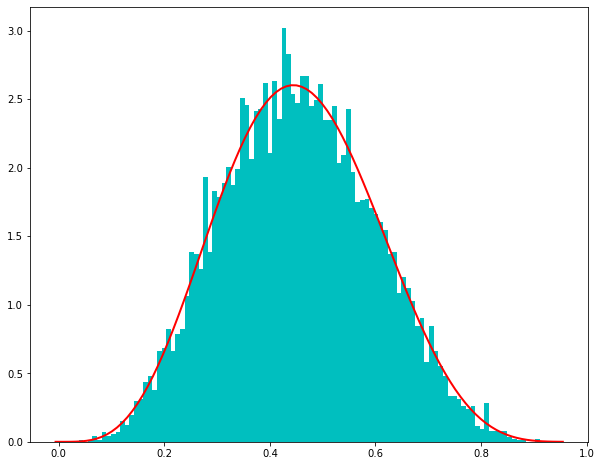

In [10]:
# simuler 10 000 observations
from scipy.stats import beta
simulate = simul_beta_obs(10000)
data_simul1 = np.array(simulate)
mu, std = 5, 6
plt.figure(figsize=(10,8))
plt.hist(data_simul1, bins=100, density=True, alpha=1, color='c')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = beta.pdf(x, *(mu,std))
plt.plot(x,p,'r', linewidth=2)
plt.show()
#plt.savefig("./figure/beta.png")

Comparaison : Notre simulation suit bien la loi beta avec $\alpha = 6 \,et\, \beta = 7$ 

**3.Estimons P(0 <= X <= 0.70) en utilisant la simulation précedente avec $N=1000$ et $k=100$**

In [11]:
N=1000
k = 100
p_ = 0
for i in range(k):
    data = np.array(simul_beta_obs(1000))
    p = data[data<=0.70]
    p = len(p)/1000
    p_ += p
p_ = p_/100
print(f"P estimé est : {p_}")

P estimé est : 0.9531999999999995


**Après simulation on obtient donc $\boldsymbol{P}(0\le X_i \le 0.70) =\,$0.95319 à $10^{-5}$**

 4.Estimons $$\boldsymbol{P}(0\le X_i \le 0.70) = \int_0^{0.70} f(x)\,\mathrm{d}x$$
 <br>
 par la methode de Monte-Carlo
 <br>
 
 On a :
 <br>
 $\boldsymbol{E}(x) \approx \frac{1}{N}\sum_{i=1}^{N}\, x_i = \int_0^\infty x\,\mathrm{d}x$
 <br>
 par analogie
 <br>
 $\int_0^{0.70} f(x)\,\mathrm{d}x = \int_0^{0.70} 1260x^{4}(1-x)^{5}\,\mathrm{d}x$ <br>
 $\hspace{2cm} ~~~~~~\approx \frac{1260}{N}\sum_{i=1}^{N}\, x_i^{4}(1-x_i)^{5}$<br>
 donc :<br>
 
 $\int_0^{0.70} f(x)\,\mathrm{d}x\approx \frac{1260}{N}\sum_{i=1}^{N}\, U_i^{4}(1-U_i)^{5}$
 <br>
 où $U_1, ..., U_N$ un échantillon généré de la loi uniforme [0,1].

In [12]:
n=1000
k=100
P = 0
for i in range(k):
    S = 0
    for j in range(n):
        U =  np.random.uniform(0,1)
        if U<=0.70 :
            S += U**4*(1-U)**5
    S = S*1260 / n
    P += S
P = P/k
P

0.951882750473169

**Après simulation on obtient donc $\boldsymbol{P}(0\le X_i \le 0.70) \approx\,0.95188 ~\,à \,10^{-5}$**

 **5.Estimons cette probabilité en utilisant la methode de trapèze** 
 <br>
 
 $\boldsymbol{P}(0\le X_i \le 0.70)\approx h\left[\frac{f(b)+f(a)}{2} \,+\,\sum_{k=1}^{n-1} f(a + kh)\,\right]$
 <br>
 Avec $a=0, b=0.70, n=100,$ et $f(x) = 1260x^{4}(1-x)^{5}$

In [13]:
a=0
b=0.70
n=100
h = (b-a)/n
P = 0
for k in range(1,n):
    P += 1260*((a+k*h)**4)*(1-(a+k*h))**5
P = h*( ((1260*((b)**4)*(1-(b))**5) +(1260*((a)**4)*(1-(a))**5))/2 + P)
P

0.9526181345288662

**par la methode de trapèze  on obtient $\boldsymbol{P}(0\le X_i \le 0.70) \approx \,0.95262 ~\,à \,10^{-5}$**

   **6.Calculons exactement cette probabilité puis comparons les résultats des methodes précédentes avec cette valeur exacte**

In [14]:
T = Symbol('t')
f = 1260*T**4*(1-T)**5
P_exacte = integrate(f,(T,0,0.7))
P_exacte

0.952651012600001

**on trouve donc $\boldsymbol{P}(0\le X_i \le 0.70) = \, 0.95265$
<br>
Comparant aux résultats précédents, la methode de Trapèze est plus précise par rapport à la methode de Monte-Carlo qui est mieux dans certains cas par rapport à la methode de question 3)**

## Probleme 3:  Calcul d’intégrale impropre

   1. Montrons que : $$I = \boldsymbol{E\,[\mathrm{e}^{- x(x-1)}\,]}$$ où $X$ est une variable aléatoire de loi exponentielle de paramètre $\lambda = 1$
   <br>
   on a :
   <br>
   
   $\boldsymbol{E}(x) = \int_0^\infty xg(x)\,\mathrm{d}x = \int_0^\infty \mathrm{e}^{-x(x-1)}\mathrm{e}^{-x}\,\mathrm{d}x = \int_0^\infty \mathrm{e}^{-x^{2}+x-x}\,\mathrm{d}x$
   <br>
   donc, $\boldsymbol{E}(x) = \int_0^\infty \mathrm{e}^{-x^{2}}\,\mathrm{d}x = I$

  **2.Déduisons en que:**$$I \approx \frac{1}{N}\sum_{i=1}^{N}\,\mathrm{e}^{-ln(U_i)(ln(U_i)+1)}\,$$ 
  <br>
  où $U_1, ..., U_N$ un échantillon généré de la loi uniforme [0,1].
 <br>
 
 on sait par Monte Carlo que: 
 <br>
 $I = \boldsymbol{E}\,[\mathrm{e}^{- x(x-1)}\,] \approx \frac{1}{N}\sum_{i=1}^{N}\,\mathrm{e}^{-x_i(x_i-1)}$
 <br>
 Posons : $x = -ln(U_i)$
 <br>
 $U_i$ suit une loi uniforme donc $-ln(U_i)$ suit une loi exponentielle, ainsi on a donc <br>
 
 $I \approx \frac{1}{N}\sum_{i=1}^{N}\,\mathrm{e}^{-ln(U_i)(ln(U_i)+1)}\,$

**3.Estimons I  et comparons avec la valeur exacte**

In [15]:
# Comparaison 
def integral_impropre(N):
    U =  np.random.uniform(0,1,N)
    tmp = np.exp(-np.log(U)*(np.log(U) + 1))
    I = np.mean(tmp)
    return I

In [114]:
k=100
for i in range(100):
    I = integral_impropre(1000)
print(f"Valeur approximative de I: {I:.7f}\nValeur exacte de I = 0.8862269")
precision = 100*(1-np.abs((np.sqrt(np.pi)/2)-I)/((np.sqrt(np.pi)/2)))
print(f"précision : {precision:.2f} %")

Valeur approximative de I: 0.8828842
Valeur exacte de I = 0.8862269
précision : 99.62 %


**Après 100 répétitions, la valeur de I estimée est précise  à 99.62 % de la valeur exacte**

 4.Donnons une approximation de $I$ en utilisant la formule de trapèze.Avec a=0, b=2000, $I$ devient donc
 <br>
 $ I = \int_0^{2000} \mathrm{e}^{-x^{2}}\,\mathrm{d}x$
 <br>
 
 rappelons la formule de trapèze :
 <br>
 $\int_a^b f(x)\,\mathrm{d}x \approx h\left[\frac{f(b)+f(a)}{2} \,+\,\sum_{k=1}^{n-1} f(a + kh)\,\right]$
 <br>
 avec $h = \frac{b-a}{n}$
 <br>
 
 donc :
 <br>
 $I \approx \frac{b-a}{n}\left[\frac{e^{-b^{2}} + \,e^{-a^{2}}}{2} \,+\,\sum_{k=1}^{n-1} e^{-(a + kh)^{2}}\,\right]$

In [17]:
a=0
b=2000
n=1000
h = (b-a)/n
I = 0
for k in range(1,n):
    I += np.exp(-(a+k*h)**2)
I = h*((np.exp(-b**2)+np.exp(-a**2))/2 + I)
print(f"I estimé est : {I}")

I estimé est : 1.0366315028478184


 **La valeur estimé de $I$ par la formule de trapèze est un peu plus grande que la valeur exacte de $I$ et moins précise comparer à Monte-Carlo** 
 

**5.Comparant à la question 3 et 4 , on constate que l'approximation de $I$ par la methode Monte Carlo est plus précise que la methode de trapèze.** 

 **6.En appliquant la même démarche utilisée aux questions 1),2) et 3), calculons par la methode de Monte Carlo:**
 <br>
 
  **6.1  : $J = \int_0^\infty \mathrm{e}^{-x^{3}}\,\mathrm{d}x$**

   $J = \int_0^\infty \mathrm{e}^{-x^{3}}\,\mathrm{d}x$
   <br>
   on a :
   <br>
   $x^{3} = x.x^{2} - x + x$
   <br>
   supposons que $J = \boldsymbol{E}(e^{-x(x^{2}-1)})$
   <br>
   donc : 
   <br>
   $\boldsymbol{E}(e^{-x(x^{2}-1)}) \approx \frac{1}{N} \sum_{i=1}^{N} e^{-x_i(x_i^{2}-1)}\,$
   <br>
   $\hspace{2cm} ~~~= \int_0^\infty \mathrm{e}^{-x(x^{2} - 1)}e^{-x}\,\mathrm{d}x$
   <br>
   $\hspace{2cm} ~~~= \int_0^\infty \mathrm{e}^{-x^{3} + x - x}\,\mathrm{d}x$
   <br>
   $\hspace{2cm} ~~~= \int_0^\infty \mathrm{e}^{-x^{3}}\,\mathrm{d}x$
   <br>
   Alors
   <br>
   $\int_0^\infty \mathrm{e}^{-x^{3}}\,\mathrm{d}x = \boldsymbol{E}(e^{-x(x^{2}-1)})$
   <br>
   $\hspace{2cm} ~~~\approx \frac{1}{N} \sum_{i=1}^{N} e^{-x_i(x_i^{2}-1)}\,$
   <br>
   $\hspace{2cm} ~~~\approx \frac{1}{N} \sum_{i=1}^{N} e^{-x_i(x_i-1)(x_i + 1)}\,$
   <br> 
   par conséquent : si $U_i$ suit une loi uniforme sur [0,1] alors $-ln(U_i)$ suit une loi exponentielle et on a donc 
   $$J \approx \frac{1}{N}\sum_{i=1}^{N}\,\mathrm{e}^{ln(U_i)(ln(U_i)-1)(ln(U_i)+1)}\,$$ 

In [56]:
# Comparaison 
def integral_impropre_J(N):
    U =  np.random.uniform(0,1,N)
    tmp = np.exp(np.log(U)*(np.log(U) + 1)*(np.log(U)-1))
    #print(tmp)
    J = np.mean(tmp)
    return J

In [63]:
integral_impropre_J(1000)

0.8927836420432644

Donc $J$ tend vers 0.89278

**6.2.** $$K = \int_0^\pi \sin(x^2)\,\mathrm{d}x$$

In [20]:
from random import random
from random import uniform
from math import sin
from math import pi

In [21]:
count=0
for i in range(N):
    point=(uniform(0,pi), random())
    if point[1] < sin(point[0]**2):
        count+=1
        
answer=(float(count)/float(N))*pi
print(answer)

1.3131857292005336


**$K = 1.31318$**

 ## Probleme 4:  Calcul d’intégrale double

 ###  Réponse 1. Approximons $D$ en utilisant la methode de Monte Carlo et la loi  de grand nombre.
$$D = \int_0^1\int_0^1 (x^2y + xy^2)\,\mathrm{d}x\mathrm{d}y$$

In [105]:
def integration2d(fonction,a,b,c,d,N):
    U = np.random.uniform(0,1,N)
    V = np.random.uniform(0,1,N)
    try:
        b = float(b)
        d = float(d)
        D = ((b-a)*(d-c))/N
        somme = 0
        for i in range(N):
            somme += fonction((a+(b-a)*U[i]),(c+(d-c)*V[i]))
        D = D*somme
    except:
        if isinstance(b,str):
            b = U
            somme=0
            for i in range(N):
                somme += (((b[i]-a)*(d-c))/N)*fonction((a+(b[i]-a)*U[i]),(c+(d-c)*V[i]))
            D = somme
        else:
            d = V 
            somme = 0
            for i in range(N):
                somme += (((b-a)*(d[i]-c))/N)*fonction((a+(b-a)*U[i]),(c+(d[i]-c)*V[i]))
            D = somme
    return D

In [76]:
def f(x,y):
    return x**2*y + x*y**2

In [120]:
D = np.mean([integration2d(f,0,1,0,1,1000) for _ in range(100)])
D

0.3334415361014927

La veleur exacte de $D$:
$$D = \int_0^1\int_0^1 (x^2y + xy^2)\,\mathrm{d}x\mathrm{d}y = \frac{1}{3} \approx 0.333333333334$$
<br>
et la valeur approché à $10^{-5}$est :
$$D \approx 0.33344$$
**La valeur approchée de D est précis à $10^{-3}$ avec la methode de Monte-Carlo** 

### Réponse 2: Experimentons la Methode de Monte Carlo sur une intégrale avec borne dépendante

In [107]:
DD = np.mean([integration2d(f,0,'x',0,1,1000) for _ in range(100)])
DD

0.1663527355438837

La veleur exacte de $D$:
$$D = \int_0^1\int_0^x (x^2y + xy^2)\,\mathrm{d}x\mathrm{d}y = \frac{1}{6}x^{2}(1+x)$$
<br>
et la valeur approché à $10^{-5}$est :
$$D \approx 0.16635$$ 
<br>
par analogie a la loi des grands nombre:
$$D \approx \sum_{i=1}^{N} \frac{(b-a)(V_i-c)}{N}f\left(a + (b-a)U_i , c + (V_i-c)V_i \right)$$

In [108]:
DD = np.mean([integration2d(f,0,1,0,'y',1000) for _ in range(100)])
DD

0.1676746880933838

La veleur exacte de $D$:
$$D = \int_0^1\int_0^y (x^2y + xy^2)\,\mathrm{d}x\mathrm{d}y = \frac{1}{6}$$
<br>
et la valeur approché à $10^{-5}$est :
$$D \approx 0.16767$$ 

## Probleme 5:  Estimation des probabilités stationnaires

soit $S = {1, 2, 3, 4}$ l'espace des états d'une chaîne de Markov de matrice de transition:
$$ \mathcal{P} = \begin{pmatrix} 2/7 & 0 & 2/7 & 3/7 \\ 1/4 & 2/4 & 0 & 2/5 \\ 1/6 & 1/3 & 1/3 & 1/6 \\ 4/10 & 3/10 & 0 & 3/10 \end{pmatrix}$$

Rapellons que la loi stationnaire $\pi = (\pi_1,\pi_2,\pi_3,\pi_4)$ est déterminée en résolvant le système d'équations:
$$ \pi = \pi\mathcal{P} \, et\,  \pi_1 + \pi_2 + \pi_3 + \pi_4 = 1$$

**2.montrons que le système précédent est équivalent à :**

\begin{array}{rcl}
\frac{2}{7}\pi_1 + \frac{1}{4}\pi_2 +\frac{1}{6}\pi_3 +\frac{4}{10}\pi_4 =\pi_1 \\
\frac{2}{4}\pi_2 +\frac{1}{3}\pi_3 +\frac{3}{10}\pi_4 =\pi_2 \\
\frac{2}{7}\pi_1 +\frac{1}{3}\pi_3 =\pi_3 \\
\frac{3}{7}\pi_1 + \frac{2}{5}\pi_2 +\frac{1}{6}\pi_3 +\frac{3}{10}\pi_4 =\pi_4 \\
\pi_1 + \pi_2 +\pi_3 +\pi_4  = 1
\end{array}
 <br>
 on a :
 <br>
 $\pi\mathcal{P} = (\pi_1,\pi_2,\pi_3,\pi_4) \begin{pmatrix} 2/7 & 0 & 2/7 & 3/7 \\ 1/4 & 2/4 & 0 & 2/5 \\ 1/6 & 1/3 & 1/3 & 1/6 \\ 4/10 & 3/10 & 0 & 3/10 \end{pmatrix}$
 <br>
 
 en faisant le produit matriciel $\pi\mathcal{P}= \pi $  et en ajoutant : $\pi_1 + \pi_2 + \pi_3 + \pi_4 = 1$
 <br>
 
 on obtient le système : \begin{array}{rcl}
\frac{2}{7}\pi_1 + \frac{1}{4}\pi_2 +\frac{1}{6}\pi_3 +\frac{4}{10}\pi_4 =\pi_1 \\
\frac{2}{4}\pi_2 +\frac{1}{3}\pi_3 +\frac{3}{10}\pi_4 =\pi_2 \\
\frac{2}{7}\pi_1 +\frac{1}{3}\pi_3 =\pi_3 \\
\frac{3}{7}\pi_1 + \frac{2}{5}\pi_2 +\frac{1}{6}\pi_3 +\frac{3}{10}\pi_4 =\pi_4 \\
\pi_1 + \pi_2 +\pi_3 +\pi_4  = 1
\end{array}

 **3.Résolvons le système d'équations précédent:**

In [26]:
P = P = np.array([[2/7-1, 1/5, 1/6, 4/10],[0,2/5-1,1/3,3/10],[2/7+1,1,1/3,1],[3/7,2/5,1/6,3/10-1]])
y = np.array([0,0,1,0])
P

array([[-0.71428571,  0.2       ,  0.16666667,  0.4       ],
       [ 0.        , -0.6       ,  0.33333333,  0.3       ],
       [ 1.28571429,  1.        ,  0.33333333,  1.        ],
       [ 0.42857143,  0.4       ,  0.16666667, -0.7       ]])

In [27]:
x = np.linalg.solve(P, y)

In [28]:
sum(x)

1.0

In [29]:
pi = np.round(x,2)
pi

array([0.29, 0.24, 0.12, 0.34])

**on trouve donc :
$\pi_1 = 0.29, \pi_2 = 0.24, \pi_3 = 0.12, \pi_4 = 0.34$**

**4.Estimons par simulation la loi stationnaire**

In [30]:
def markov_avec_p(k,P,x0):
    X = np.zeros(k, dtype=np.int64)
    X[0]=x0
    for k in range(k-1):
        X[k+1] = np.random.choice(a=range(len(P)), p=P[X[k],:])
    return X

In [31]:
def table_markov(N,k,p,x0):
    tab = []
    for i in range(N):
        s = markov_avec_p(k,P,x0)[k-1] + 1
        tab.append(s)
    return np.array(tab)

    

In [32]:
from collections import Counter

In [33]:
def calcule_freq(tab):
    freq = Counter(tab)
    return freq

In [34]:
P = np.array([[2/7, 1/5, 1/6, 4/10],[0,2/5,1/3,3/10],[2/7,0,1/3,0],[3/7,2/5,1/6,3/10]]).T
N = 10000
k = 20
x0 = 1/4

In [35]:
table_mark = table_markov(N,k,P,x0)
tab_freq = calcule_freq(table_mark)

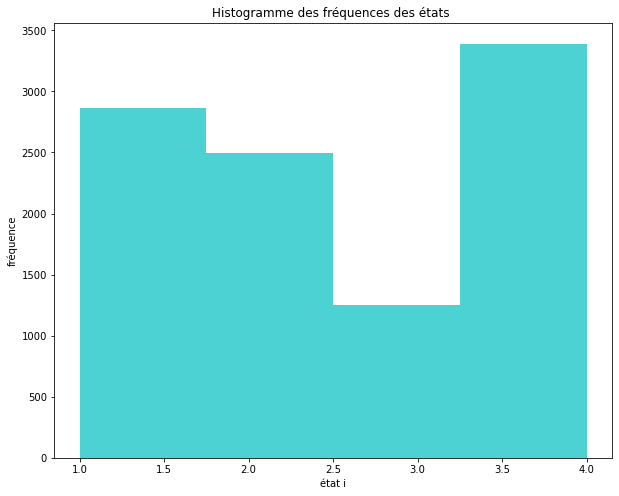

In [36]:
data_mark = table_mark
plt.figure(figsize=(10,8))
plt.hist(data_mark, bins=4,alpha=0.7, color='c')
plt.title("Histogramme des fréquences des états ")
plt.xlabel('état i')
plt.ylabel('fréquence')
plt.show()

In [37]:
# Estimation des proba
pas = 100
serie = [1,2,3,4]
pi_estime = []
for i in range(pas):
    table_mark = table_markov(N,k,P,x0)
    tab_freq = calcule_freq(table_mark)
    tab_freq = {key:tab_freq[key] for key in serie}
    pi_estime1 = [j/N for j in tab_freq.values()]
    pi_estime.append(pi_estime1)

pi_estime = np.array(pi_estime)
test = []
for j in range(len(serie)):
    pi = np.mean(pi_estime[:,j])
    test.append(pi)
    print(f"pi_{j+1} = {pi:.2f}")
print(f"somme({test}) = {sum(test)}")

pi_1 = 0.29
pi_2 = 0.24
pi_3 = 0.12
pi_4 = 0.34
somme([0.289656, 0.240981, 0.12452000000000002, 0.34484300000000007]) = 1.0


**en arrondissant à 2 chiffres après la virgule, on a:**
<br>

**$\hat{\pi_1 } = 0.29, \hat{\pi_2 } = 0.24, \hat{\pi_3 } = 0.12, \hat{\pi_4 } = 0.34$**

**on constate donc que les probabilités estimées sont sensiblement égales aux probabilités théoriques avec une forte précision.**

## Probleme 6: Estimation du temps de retour

soit $ S = {1, 2, 3}$ l'espace des états d'une chaîne de Markov de matrice de transition:
$$ \mathcal{P} = \begin{pmatrix} 1 & 0 & 0 \\ 1/3 & 1/6 & 1/2 \\ 2/5 & 2/5 & 1/5 \end{pmatrix}$$

1.Expliquons que les états 2 et 3 de cette chaine de Markov sont transitoires. 

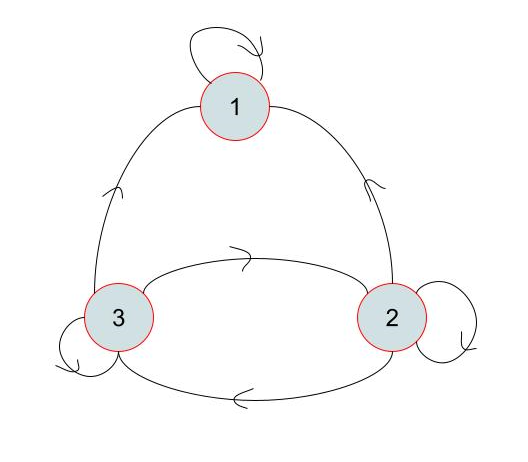

**D'après le graphique , l'on peut avoir : $ 2 \to 2 \to 3 \to 1 \,$ et\, $3 \to 3 \to 2 \to 1 $,$3 \to 2 \to 3  $, quand on quitte 2 ou 3 la probabilité  d'y revenir n'est pas certaines d'où les états 2 et 3 de cette chaîne de Markov sont transitoires.**

2.Rappelons que le nombre moyen de visite d’un état i est donnée par : 
$$
\boldsymbol{E}(N_i|X_0= i) = \sum_{k=0}^{\infty}\mathcal{P}_{ii}^{\,(k)}\,~~~~ avec\,~~~~\mathcal{P}_{ii}^{\,(0)} = 1
$$
<br>
Évaluons avec une précision à $10^{-5}$ : <br>
- la valeur de $\boldsymbol{E}(N_i|X_0= i)$ pour l'état 2

In [150]:
def visite_etat(i,p,e):
    di = p[i-1,i-1]
    E = 1 + di
    produit = np.eye(p.shape[0]).dot(p)
    precision = E - 1
    while precision >= e:
        E_ = E
        produit = produit.dot(p)
        E += produit[i-1,i-1]
        precision = E - E_
    return E

In [152]:
p = np.array([
    [1,0,0],
    [1/3,1/6,1/2],
    [2/5,2/5,1/5]
])
i=2
e=10**(-5)
visite_etat(i,p,e)

1.7142727253734007

**le nombre de visite moyen de l'état 2 est de 1,71427 à $10^{-5}$**

**Évaluons avec une précision à $10^{-5}$** : <br>
- la valeur de $\boldsymbol{E}(N_i|X_0= i)$ pour l'état 3

In [154]:
i = 3
visite_etat(i,p,e)

1.7857002919132128

**Le nombre de visite moyen de l'état 3 est de 1,78570 à $10^{-5}$**

3.soit $$\boldsymbol{E}(N_i|X_0= i) = \frac{1}{1-f_i}$$
<br>
donc : $$f_i = 1 - \frac{1}{\boldsymbol{E}(N_i|X_0= i)}$$
<br>


**Évaluons avec une précision à $10^{-5}$** : <br>
- la valeur de $f_i$ pour l'état 2

In [157]:
f2 = 1 - 1/visite_etat(2,p,e)
f2

0.4166622467949601

**La probabilité de retour à l'état 2 est: $f_2 = 0.42$**

**Évaluons avec une précision à $10^{-5}$** : <br>
- la valeur de $f_3$ pour l'état 3

In [158]:
f3 = 1 - 1/visite_etat(3,p,e)
f3

0.439995611509593

**La probabilité de retour à l'état 3 est de: $f_3 = 0.44$**